In [233]:
import pandas as pd
import numpy as np
import seaborn as sns

from urllib.parse import urlencode
import pandahouse as ph



import matplotlib.pyplot as plt
import plotly.express as px

from scipy import stats
from scipy.stats import norm

import re
from tqdm.auto import tqdm

plt.style.use('seaborn-dark-palette')
%matplotlib inline

In [134]:
active_studs = pd.read_csv('Проект_2_active_studs.csv')
checks = pd.read_csv('Проект_2_checks.csv', sep = ';')
group_add = pd.read_csv('Проект_2_group_add.csv')
groups = pd.read_csv('Проект_2_groups.csv', sep = ';')

### Развед Анализ

In [135]:
checks.head()
# checks.csv – файл с информацией об оплатах пользователей в дни проведения эксперимента. 

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


In [136]:
active_studs.head()
# active_studs.csv – файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [137]:
group_add.head()
# groups_add.csv – дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


In [138]:
groups.head()
##groups.csv – файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе
# (А – контроль, B – целевая группа) 

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [139]:
checks = checks.rename(columns = {'student_id': 'id'})
print(checks.info())
print('Уникальных ID:', groups.id.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      541 non-null    int64  
 1   rev     541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB
None
Уникальных ID: 74484


In [140]:
print(groups.info())
print('Уникальных ID:', groups.id.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
None
Уникальных ID: 74484


In [141]:
print(group_add.info())
print('Уникальных ID:', group_add.id.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB
None
Уникальных ID: 92


In [142]:
active_studs = active_studs.rename(columns = {'student_id': 'id'})
print(active_studs.info())
print('Уникальных ID:', active_studs.id.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB
None
Уникальных ID: 8341


### Проведение расчетов

In [143]:
# Соединил дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
# с файлом с информацией о принадлежности пользователя к контрольной или экспериментальной группе
all_id_table = pd.concat([groups, group_add])
all_id_table.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [144]:
# Просмaтриваю, нет ли повторяющихся id у экспериметальной и контрольной групп
if all_id_table['id'].nunique() == len(all_id_table.index):
    print("Нет повторяющихся id")
else:
    print('Есть повторяющиеся id')

Нет повторяющихся id


In [145]:
# merge inner
activ_users_table = pd.merge(active_studs, all_id_table, how='inner')
# Количество дубликатов данных среди активных пользователей
activ_users_table.duplicated().sum()

0

##### Количество активных юзеров в таблице по группам

In [146]:
# Количество активных юзеров в таблице по группам
active_users_table_by_grp= activ_users_table.grp.value_counts()
active_users_table_by_grp

B    6803
A    1538
Name: grp, dtype: int64

In [147]:
# Количество активных юзеров в таблице по группам (ДАТАФРЕЙМ, сделал, т.к затем буду обьединять в общую таблицу)
active_users_table_by_grp_tt = activ_users_table.groupby('grp', as_index = False).agg({'id':'count'})
active_users_table_by_grp_tt

,grp,id
0,A,1538
1,B,6803


##### Процентное распределение активных пользователей

In [148]:
group_A = activ_users_table.query('grp == "A"').value_counts().sum()
group_B = activ_users_table.query('grp == "B"').value_counts().sum()
# Процентное распределение
group_A_percent = group_A/(group_A + group_B)* 100
group_B_percent = group_B/(group_A + group_B)* 100
print(f'Процентое распределение активных пользователей в группе А = {group_A_percent} %')
print(f'Процентое распределение активных пользователей в группе B = {group_B_percent} %')

Процентое распределение активных пользователей в группе А = 18.439036086800144 %
Процентое распределение активных пользователей в группе B = 81.56096391319986 %


In [149]:
percent_active_users_in_grp = activ_users_table.grp.value_counts(normalize=True).mul(100)
percent_active_users_in_grp

B    81.560964
A    18.439036
Name: grp, dtype: float64

In [150]:
# Процентое распределение активных пользователей по группам (ДАТАФРЕЙМ, сделал, т.к затем буду обьединять в общую таблицу)
percent_active_users_in_grp_df = pd.DataFrame(percent_active_users_in_grp).sort_values(by=['grp']).reset_index().rename(columns = {'index':'grp', 'grp':'percent_of_active_users'})
percent_active_users_in_grp_df

,grp,percent_of_active_users
0,A,18.439036
1,B,81.560964


##### Сумма заработанных средств по группам


In [151]:
all_active_users = activ_users_table.merge(checks, on='id', how='left')
all_active_users.head()

,id,grp,rev
0,581585,A,NaN
1,5723133,A,NaN
2,3276743,B,NaN
3,4238589,A,NaN
4,4475369,B,NaN


In [152]:
# Общая сумма заработанных денег с двух групп
all_summ = all_active_users.rev.sum()
all_summ

467794.00350000005

In [153]:
all_active_users = activ_users_table.merge(checks, on='id', how='left')
all_payed_active_users= all_active_users.query('rev != "NaN"')
grouped_summ = all_active_users.groupby('grp', as_index = False).agg({'rev':'sum'})
grouped_summ

,grp,rev
0,A,72820.0000
1,B,394974.0035


In [154]:
# Проверил число повторяющихся дубликатов (id в первую очередь)
all_active_users.duplicated().sum()

0

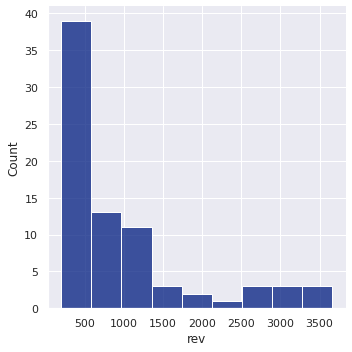

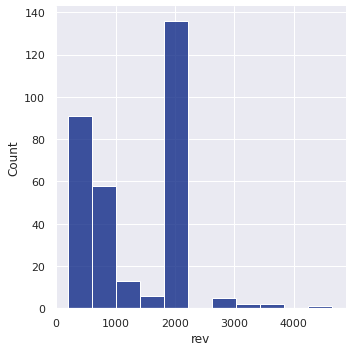

In [155]:
# Распределение количества чеков по цене и кол-ву
sns.displot(all_active_users[all_active_users.grp == 'A'].rev)
sns.displot(all_active_users[all_active_users.grp == 'B'].rev)

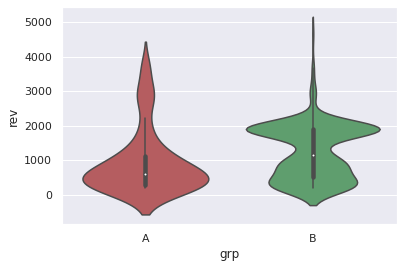

In [156]:
sns.violinplot(x='grp', y='rev', data=all_active_users, palette = ['r','g'])
sns.set(rc={'figure.figsize':(10,6)})

##### Количество купивших продукт за все время проведения теста

In [157]:
# Работаем с пользователями, купившими продукт (rev != NaN)
all_payed_active_users= all_active_users.query('rev != "NaN"')
# Количество купивших продукт за все время проведения теста
count_by_gr_and_rev = all_payed_active_users.groupby('grp', as_index = False).agg({'rev':'count'})
count_by_gr_and_rev = count_by_gr_and_rev.rename(columns=({'rev':'count_payed'}))
count_by_gr_and_rev

,grp,count_payed
0,A,78
1,B,314


### Расчет ARPU & проверка Тестами

In [158]:
# Расчет ARPU 
# ARPU - это средняя прибыль компании от одного активного пользователя за конкретный период.
active_users_A = all_active_users.query('grp == "A"')
active_users_B = all_active_users.query('grp == "B"')
ARPU_A = active_users_A.rev.sum() / active_users_A.id.count()
ARPU_B = active_users_B.rev.sum() / active_users_B.id.count()
print(f'Метрика ARPU для контрольной группы А = {ARPU_A}')
print(f'Метрика ARPU для целевой группы B = {ARPU_B}')

Метрика ARPU для контрольной группы А = 47.34720416124838
Метрика ARPU для целевой группы B = 58.05879810377775


In [159]:
# Расчет ARPU - Датафрейм
for_ARPU = all_active_users.groupby('grp', as_index = False).agg({'rev':'sum', 'id': 'count'})
for_ARPU['ARPU'] =for_ARPU['rev']/for_ARPU['id']
ARPU_coef_table = for_ARPU.drop(columns=['rev', 'id'])
ARPU_coef_table

,grp,ARPU
0,A,47.347204
1,B,58.058798


In [160]:
stats.shapiro(active_users_A.rev)

ShapiroResult(statistic=nan, pvalue=1.0)

### Расчет ARPPU & проверка Тестами

In [161]:
# Расчет ARPPU
# ARPPU — средний доход с одного покупателя за определённый период времени
active_users_A_ARPPU = all_active_users.query('grp == "A" & rev != "NaN"')
active_users_B_ARPPU = all_active_users.query('grp == "B" & rev != "NaN"')
ARPPU_A = active_users_A_ARPPU.rev.sum() / active_users_A_ARPPU.id.count()
ARPPU_B = active_users_B_ARPPU.rev.sum() / active_users_B_ARPPU.id.count()
print(f'Метрика ARPPU для контрольной группы А = {ARPPU_A}')
print(f'Метрика ARPPU для целевой группы B = {ARPPU_B}')

Метрика ARPPU для контрольной группы А = 933.5897435897435
Метрика ARPPU для целевой группы B = 1257.8789920382164


In [162]:
# Расчет ARPPU - Датафрейм
for_ARPPU = all_active_users.query('rev != "NaN"').groupby('grp', as_index = False).agg({'rev':'sum', 'id': 'count'})
for_ARPPU['ARPPU'] =for_ARPPU['rev']/for_ARPPU['id']
ARPPU_coef_table = for_ARPPU.drop(columns=['rev', 'id'])
ARPPU_coef_table

,grp,ARPPU
0,A,933.589744
1,B,1257.878992


In [163]:
# Проверка тестом Шапиро для контрольной группы А(А – контроль, B – целевая группа) 
stats.shapiro(active_users_A_ARPPU.rev)
# pvalue < 0.05 

ShapiroResult(statistic=0.7353236079216003, pvalue=1.4986822893803264e-10)

In [164]:
# Проверка тестом Шапиро для целевой группы В (А – контроль, B – целевая группа)
stats.shapiro(active_users_B_ARPPU.rev)
# pvalue < 0.05 

ShapiroResult(statistic=0.8547235727310181, pvalue=1.5437024585965894e-16)

### Расчет CR & проверка Тестами

In [165]:
# Расчет CR
#CR - отношение количества оплативших клиентов к общему числу активных клиентов.
active_users_A_ARPPU = all_active_users.query('grp == "A" & rev != "NaN"')
active_users_A = all_active_users.query('grp == "A"')
active_users_B_ARPPU = all_active_users.query('grp == "B" & rev != "NaN"')
active_users_B = all_active_users.query('grp == "B"')

CR_A = active_users_A_ARPPU.id.count()/active_users_A.id.count()
CR_B = active_users_B_ARPPU.id.count()/active_users_B.id.count()
print(f'Метрика CR для контрольной группы А = {CR_A}')
print(f'Метрика CR для целевой группы B = {CR_B}')

Метрика CR для контрольной группы А = 0.05071521456436931
Метрика CR для целевой группы B = 0.046156107599588415


In [166]:
# Расчет CR - Датафрейм
CR_ch = for_ARPPU.drop(columns=['rev','ARPPU'])
CR_zm= all_active_users.groupby('grp', as_index = False).agg({'rev':'sum', 'id': 'count'}).drop(columns=['rev'])
CR_zm= all_active_users.groupby('grp', as_index = False).agg({'rev':'sum', 'id': 'count'}).drop(columns=['rev'])
CR_zm['CR'] = CR_ch['id']/CR_zm['id']
CR_table = CR_zm.drop(columns=['id'])
CR_table

,grp,CR
0,A,0.050715
1,B,0.046156


In [167]:
all_active_users['cr'] = np.where(all_active_users.rev > 0, 1, 0)
all_active_users.head()

,id,grp,rev,cr
0,581585,A,NaN,0
1,5723133,A,NaN,0
2,3276743,B,NaN,0
3,4238589,A,NaN,0
4,4475369,B,NaN,0


In [168]:
# Тест Левена.
A_CR = all_active_users.query('grp == "A"').cr
B_CR = all_active_users.query('grp == "B"').cr
stats.levene(A_CR, B_CR)

LeveneResult(statistic=0.5820524099411407, pvalue=0.44553054513518253)

### Общая таблица

In [169]:
ALL_TABLE = pd.merge(count_by_gr_and_rev, grouped_summ, how = 'outer')\
        .merge(percent_active_users_in_grp_df, on='grp', how='outer')\
        .merge(ARPU_coef_table, on='grp', how='outer')\
        .merge(ARPPU_coef_table, on='grp', how='outer')\
        .merge(CR_table, on='grp', how='outer')
ALL_TABLE

,grp,count_payed,rev,percent_of_active_users,ARPU,ARPPU,CR
0,A,78,72820.0000,18.439036,47.347204,933.589744,0.050715
1,B,314,394974.0035,81.560964,58.058798,1257.878992,0.046156


### Выводы

In [234]:
# Разница между группами в процентах В(81.561 %), А(18.439 %), следовательно будет наблюдаться разная мощность тестов
# Общая сумма rev в таблице ALL_TABLE также различается
# Конверсия CR падает (Метрики CR для групп А = 0.0507, В = 0.0462)
# Показатели ARPU (Метрика ARPU для А = 47.348, В= 58.058) и ARPPU (Метрика ARPPU для А = 933.5897, В= 1257.879) увеличиваются

# РАЗЛИЧИЯ ИМЕЮТСЯ В СВЯЗИ С УВЕЛИЧЕНИЕМ РАЗМЕРОВ ВЫБОРКИ.

### БУСТРАП

In [171]:
def get_bootstrap(
    column_A, # значения первой (A-контрольной) выборки
    column_B, # значения второй (B-тестовой) выборки
    boot_it = 5000, # количество бутстрап-подвыборок
    alpha_coef = 0.95, # коэф-т значимости
    statistic = np.mean):  
    
    data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = column_A.sample(
            len(column_A), 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = column_B.sample(
            len(column_A), 
            replace = True
        ).values
        
        data.append(statistic(samples_1)-statistic(samples_2)) # mean() - применяем статистику
        
    pd_data = pd.DataFrame(data)
        
    left_quant = (1 - alpha_coef)/2
    right_quant = 1 - (1 - alpha_coef) / 2
    quants = pd_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(data), 
        scale = np.std(data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(data), 
        scale = np.std(data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_data[0], bins = 100)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('black')

        else: 
            bar.set_facecolor('red')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=0,linestyle='--')
    plt.xlabel('data')
    plt.ylabel('frequency')
    plt.title("Boostrap_model")
    plt.show()
       
    return {"data": data, 
            "quants": quants, 
            "p_value": p_value}

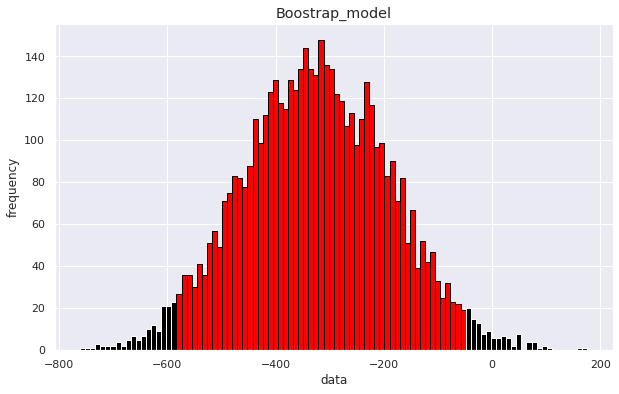

{'data': [-211.23078333333353,
  -235.1923141025643,
  -302.15385769230795,
  -446.1923192307693,
  -242.1153935897437,
  -319.8333435897438,
  -328.43590128205153,
  -204.47437051282043,
  -277.2179615384614,
  -326.0897589743589,
  -399.3077012820513,
  -410.70513974358994,
  93.37178589743598,
  -220.74360384615386,
  -196.25641538461537,
  -337.71796153846185,
  -309.5000128205128,
  -268.333344871795,
  -352.41026666666676,
  -193.02565256410253,
  -201.6666756410258,
  -249.47436282051274,
  -308.69231410256396,
  -362.46155128205123,
  -347.21796282051287,
  -397.83333974358993,
  -306.3205230769232,
  -277.47437051282066,
  -259.01283076923096,
  -422.30770512820504,
  -127.61539358974369,
  -147.62820897435904,
  -447.1538551282051,
  -246.39744487179485,
  -253.576935897436,
  -377.92308846153855,
  -487.1282217948718,
  -412.87181666666663,
  -264.20514230769265,
  -431.93591025641035,
  -603.3589820512822,
  -493.4615500000002,
  -306.64103461538457,
  -316.6153961538463,
 

In [172]:
get_bootstrap(
    all_payed_active_users[all_payed_active_users.grp == 'A'].rev, # числовые значения первой выборки
    all_payed_active_users[all_payed_active_users.grp == 'B'].rev, # числовые значения второй выборки
    boot_it = 5000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    alpha_coef = 0.95 # уровень значимости
             )

 # 2. SQL

In [173]:
connection = {'host': 'https://clickhouse.lab.karpov.courses',
                      'database': 'default',
                      'user': 'student',
                      'password': 'dpo_python_2020'
                     }

## 2.1 Очень усердные ученики.

### 2.1.1 Условие

Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое маленькое задание называется "горошиной".

Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин.

In [174]:
top_student = '''
    SELECT
        COUNT(st_id) as top_student
    FROM 
        (
        SELECT
            st_id,
            SUM(correct) AS making_tasks
        FROM peas
        WHERE FROM_UNIXTIME(timest, '%Y-%m') = '2024-07'
        GROUP BY st_id
        HAVING making_tasks >= 20
        )
'''

In [175]:
How_much_top_students = ph.read_clickhouse(query=top_student, connection=connection)
How_much_top_students

,top_student
0,0


##### Альтернатива в виде функции в выбранном периоде (общий костыль на любой период - главное, чтоб были значения в конкретной таблице)

In [176]:
period = '''
     SELECT MIN(toDate(timest)) AS NACHALNAYA,
            MAX(toDate(timest)) AS KONECNAYA
       FROM peas
     '''

In [177]:
# Даты в исходной таблице
period = ph.read_clickhouse(query=period, connection=connection)
period

,NACHALNAYA,KONECNAYA
0,2021-10-30,2021-10-31


In [178]:
Lyboi_period_po_topy = '''    
    SELECT
        COUNT(st_id) as top_student
    FROM 
        (
        SELECT
            st_id,
            SUM(correct) AS making_tasks
        FROM peas
        WHERE YEAR(NOW()) AND MONTH(NOW())
        GROUP BY st_id
        HAVING making_tasks >= 20
        )
 '''   

In [179]:
# В данном случае считал период, по конкретным данным, имеющимся в таблице peas, был бы другой период в выборке - результат бы изменился
Lyboi_period_po_topy = ph.read_clickhouse(query=Lyboi_period_po_topy, connection=connection)
Lyboi_period_po_topy

,top_student
0,136


###  2.2 Оптимизация воронки

#### 2.2.1 Условие

Образовательная платформа предлагает пройти студентам курсы по модели trial: студент может решить бесплатно лишь 30 горошин в день. Для неограниченного количества заданий в определенной дисциплине студенту необходимо приобрести полный доступ. Команда провела эксперимент, где был протестирован новый экран оплаты.

Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:

ARPU

ARPAU

CR в покупку 

СR активного пользователя в покупку 

CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике

ARPU считается относительно всех пользователей, попавших в группы.

Активным считается пользователь, за все время решивший больше 10 задач правильно в любых дисциплинах.

Активным по математике считается пользователь, за все время решивший 2 или больше задач правильно по математике.

##### Проводил расчет по частям, затем заджоинил

In [180]:
### РАСЧЕТ ARPU
ARPU = '''
SELECT 
    a.test_grp as test_grp, 
    ROUND(b.money / a.count_test_grp, 2) AS ARPU
FROM 
    (
    SELECT 
        test_grp,
        COUNT(test_grp) AS count_test_grp 
    FROM 
        studs
    GROUP BY
        test_grp
    ) AS a
JOIN 
    (
    SELECT 
        test_grp,
        SUM(money) AS money
    FROM 
        studs 
    LEFT JOIN
        final_project_check
    ON 
        studs.st_id = final_project_check.st_id
    GROUP BY test_grp
    ) AS b
ON a.test_grp = b.test_grp
'''

In [181]:
ARPU_new = ph.read_clickhouse(query=ARPU, connection=connection)
ARPU_new

,test_grp,ARPU
0,control,4540.98
1,pilot,11508.47


In [182]:
### РАСЧЕТ ARPAU

ARPAU = '''
SELECT
    test_grp as test_grp, 
    ROUND(all_money / active_users, 2) AS ARPAU_coef
FROM
    (SELECT 
        test_grp, 
        SUM(money) as all_money
    FROM 
        studs 
    LEFT JOIN
        final_project_check
    ON 
        studs.st_id = final_project_check.st_id
    GROUP BY 
        test_grp
    ) AS a
JOIN 
    (
    SELECT
        test_grp,
        COUNT(b.st_id) AS active_users
    FROM 
        studs 
    LEFT JOIN
        (
        SELECT
            st_id, 
            SUM(correct) AS score
        FROM 
            peas 
        GROUP BY
            st_id
        HAVING 
            score > 10
        ) AS b
    ON 
        studs.st_id = b.st_id
    WHERE 
        score != 0 
    GROUP BY 
        test_grp
    ) AS c
ON 
    a.test_grp = c.test_grp
'''

In [183]:
ARPAU_new = ph.read_clickhouse(query=ARPAU, connection=connection)
ARPAU_new

,test_grp,ARPAU_coef
0,control,10905.51
1,pilot,35364.58


In [184]:
# РАСЧЕТ CR_active
CR_active = '''
SELECT
    c.test_grp as test_grp,
    ROUND(b.premium_users / c.active_users, 2) AS CR_activ
FROM
    (
    SELECT
    test_grp,
    COUNT(a.st_id) AS active_users
        FROM studs 
    LEFT JOIN
        (
        SELECT
            st_id,
            SUM(correct) AS score
        FROM 
            peas 
        GROUP BY
            st_id
        HAVING
            score > 10
        ) AS a
    ON 
        studs.st_id = a.st_id
    WHERE
        score != 0 
    GROUP BY 
        test_grp
    ) AS c
JOIN
    (
    SELECT 
        test_grp,
        COUNT(DISTINCT final_project_check.st_id) AS premium_users
    FROM 
        studs 
    LEFT JOIN 
        final_project_check
    ON 
        studs.st_id = final_project_check.st_id
    WHERE 
        final_project_check.money != 0
    GROUP BY
        test_grp
    ) AS b
ON 
    c.test_grp = b.test_grp
'''

In [185]:
CR_active = ph.read_clickhouse(query=CR_active, connection=connection)
CR_active

,test_grp,CR_activ
0,control,0.12
1,pilot,0.33


In [186]:
# РАСЧЕТ CR
CR = '''
Select
    a.test_grp as test_grp,
    ROUND(b.premium_users / a.count_test_grp, 2) AS CR
FROM
    (
    SELECT 
        test_grp,
        COUNT(test_grp) AS count_test_grp 
    FROM 
        studs
    GROUP BY
        test_grp
    ) AS a
JOIN
    (
    SELECT 
        test_grp,
        COUNT(DISTINCT final_project_check.st_id) AS premium_users
    FROM 
        studs 
    LEFT JOIN 
        final_project_check
    ON 
        studs.st_id = final_project_check.st_id
    WHERE 
        final_project_check.money != 0
    GROUP BY
        test_grp
    ) AS b
ON 
    a.test_grp = b.test_grp
'''

In [187]:
CR = ph.read_clickhouse(query=CR, connection=connection)
CR

,test_grp,CR
0,control,0.05
1,pilot,0.11


In [188]:
# РАСЧЕТ CR_math
CR_math = '''
select
    test_grp,
    ROUND(b.premium_active_math_users / a.active_math_users, 2) AS CR_active_math 
from
(
SELECT 
    test_grp,
    COUNT(test_grp) AS active_math_users
FROM studs 
LEFT JOIN
    (
    SELECT
        st_id,
        SUM(correct) AS score_math
    FROM
        peas
    WHERE
        subject = 'Math'
    GROUP BY
        st_id, 
        subject
    HAVING 
        score_math >= 2
    ) AS a
ON 
    studs.st_id = a.st_id
WHERE
    score_math != 0
GROUP BY
    test_grp
) as a
join
(
SELECT 
    test_grp,
    COUNT(*) AS premium_active_math_users
FROM 
    (
    SELECT
        st_id, 
        SUM(correct) AS score_math
    FROM
        peas
    WHERE
        subject = 'Math'
    GROUP BY 
        st_id,
        subject
    HAVING 
        score_math >= 2
    ORDER BY
        score_math
    ) AS a
JOIN 
    (
    SELECT *
    FROM
        final_project_check
    WHERE 
        subject = 'Math'
    ) AS b
ON 
    a.st_id = b.st_id
JOIN 
    studs
ON 
    b.st_id = studs.st_id
GROUP BY
    test_grp
) as b
ON 
    a.test_grp = b.test_grp
'''

In [189]:
CR_math = ph.read_clickhouse(query=CR_math, connection=connection)
CR_math

,test_grp,CR_active_math
0,control,0.06
1,pilot,0.10


### Заджоинил все таблицы

In [190]:
All_table = '''
SELECT
    A.test_grp as group,
    A.ARPU_coef as ARPU_coef,
    B.ARPAU_coef as ARPAU_coef,
    C.CR as CR_coef,
    D.CR_activ as CR_activ_coef,
    E.CR_active_math as CR_active_math_coef
FROM
    (
    SELECT 
        a.test_grp as test_grp, 
        ROUND(b.money / a.count_test_grp, 2) AS ARPU_coef
    FROM 
        (
        SELECT 
            test_grp,
            COUNT(test_grp) AS count_test_grp 
        FROM 
            studs
        GROUP BY
            test_grp
        ) AS a
    JOIN 
        (
        SELECT 
            test_grp,
            SUM(money) AS money
        FROM 
            studs 
        LEFT JOIN
            final_project_check
        ON 
            studs.st_id = final_project_check.st_id
        GROUP BY test_grp
        ) AS b
    ON a.test_grp = b.test_grp) AS A
JOIN
    (
    SELECT
        test_grp as test_grp, 
        ROUND(all_money / active_users, 2) AS ARPAU_coef
    FROM
        (SELECT 
            test_grp, 
            SUM(money) as all_money
        FROM 
            studs 
        LEFT JOIN
            final_project_check
        ON 
            studs.st_id = final_project_check.st_id
        GROUP BY 
            test_grp
        ) AS a
    JOIN 
        (
        SELECT
            test_grp,
            COUNT(b.st_id) AS active_users
        FROM 
            studs 
        LEFT JOIN
            (
            SELECT
                st_id, 
                SUM(correct) AS score
            FROM 
                peas 
            GROUP BY
                st_id
            HAVING 
                score > 10
            ) AS b
        ON 
            studs.st_id = b.st_id
        WHERE 
            score != 0 
        GROUP BY 
            test_grp
        ) AS c
    ON 
        a.test_grp = c.test_grp
    ) AS B
ON
    A.test_grp = B.test_grp
JOIN
    (
    Select
        a.test_grp as test_grp,
        ROUND(b.premium_users / a.count_test_grp, 2) AS CR
    FROM
        (
        SELECT 
            test_grp,
            COUNT(test_grp) AS count_test_grp 
        FROM 
            studs
        GROUP BY
            test_grp
        ) AS a
    JOIN
        (
        SELECT 
            test_grp,
            COUNT(DISTINCT final_project_check.st_id) AS premium_users
        FROM 
            studs 
        LEFT JOIN 
            final_project_check
        ON 
            studs.st_id = final_project_check.st_id
        WHERE 
            final_project_check.money != 0
        GROUP BY
            test_grp
        ) AS b
    ON 
        a.test_grp = b.test_grp
    ) AS C
ON
    B.test_grp = C.test_grp
JOIN
    (
    SELECT
        c.test_grp as test_grp,
        ROUND(b.premium_users / c.active_users, 2) AS CR_activ
    FROM
        (
        SELECT
        test_grp,
        COUNT(a.st_id) AS active_users
            FROM studs 
        LEFT JOIN
            (
            SELECT
                st_id,
                SUM(correct) AS score
            FROM 
                peas 
            GROUP BY
                st_id
            HAVING
                score > 10
            ) AS a
        ON 
            studs.st_id = a.st_id
        WHERE
            score != 0 
        GROUP BY 
            test_grp
        ) AS c
    JOIN
        (
        SELECT 
            test_grp,
            COUNT(DISTINCT final_project_check.st_id) AS premium_users
        FROM 
            studs 
        LEFT JOIN 
            final_project_check
        ON 
            studs.st_id = final_project_check.st_id
        WHERE 
            final_project_check.money != 0
        GROUP BY
            test_grp
        ) AS b
    ON 
        c.test_grp = b.test_grp
    ) AS D
ON
C.test_grp = D.test_grp
JOIN
    (
    SELECT
        test_grp,
        ROUND(b.premium_active_math_users / a.active_math_users, 2) AS CR_active_math 
    FROM
    (
    SELECT 
        test_grp,
        COUNT(test_grp) AS active_math_users
    FROM 
        studs 
    LEFT JOIN
        (
        SELECT
            st_id,
            SUM(correct) AS score_math
        FROM
            peas
        WHERE
            subject = 'Math'
        GROUP BY
            st_id, 
            subject
        HAVING 
            score_math >= 2
        ) AS a
    ON 
        studs.st_id = a.st_id
    WHERE
        score_math != 0
    GROUP BY
        test_grp
    ) AS a
    JOIN
    (
    SELECT 
        test_grp,
        COUNT(*) AS premium_active_math_users
    FROM 
        (
        SELECT
            st_id, 
            SUM(correct) AS score_math
        FROM
            peas
        WHERE
            subject = 'Math'
        GROUP BY 
            st_id,
            subject
        HAVING 
            score_math >= 2
        ORDER BY
            score_math
        ) AS a
    JOIN 
        (
        SELECT *
        FROM
            final_project_check
        WHERE 
            subject = 'Math'
        ) AS b
    ON 
        a.st_id = b.st_id
    JOIN 
        studs
    ON 
        b.st_id = studs.st_id
    GROUP BY
        test_grp
    ) as b
    ON 
        a.test_grp = b.test_grp
    ) AS E
ON
    D.test_grp = E.test_grp
'''

In [191]:
ALL_TABLE_SQL = ph.read_clickhouse(query=All_table, connection=connection)
ALL_TABLE_SQL

,group,ARPU_coef,ARPAU_coef,CR_coef,CR_activ_coef,CR_active_math_coef
0,control,4540.98,10905.51,0.05,0.12,0.06
1,pilot,11508.47,35364.58,0.11,0.33,0.10


## 3. PYTHON

### 3.1 Задача

Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.

Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [230]:
def function(NEW_TABLE):
    NEW_TABLE = pd.read_csv(NEW_TABLE)
    NEW_TABLE.rename(columns={NEW_TABLE.columns[0]: 'id', NEW_TABLE.columns[1]: 'grp'}, inplace=True)    
    
    groups = pd.read_csv('Проект_2_groups.csv', sep=';')
    active_studs = pd.read_csv('Проект_2_active_studs.csv')
    active_studs.rename(columns={'student_id': 'id'}, inplace=True)
    checks = pd.read_csv('Проект_2_checks.csv', sep=';')
    checks.rename(columns={'student_id': 'id'}, inplace=True)
    
    active_studs.rename(columns={'student_id': 'id'}, inplace=True)
    
    all_id_table = pd.concat([groups, group_add])
    activ_users_table = pd.merge(active_studs, all_id_table, how='inner')

    # Количество активных юзеров в таблице по группам
    active_users_table_by_grp_tt = activ_users_table.groupby('grp', as_index = False).agg({'id':'count'})

    # Процентное распределение в группах в процентах
    percent_active_users_in_grp = activ_users_table.grp.value_counts(normalize=True).mul(100)
    percent_active_users_in_grp_df = pd.DataFrame(percent_active_users_in_grp).sort_values(by=['grp']).reset_index().rename(columns = {'index':'grp', 'grp':'percent_of_active_users'})
    percent_active_users_in_grp_df
    
    # Сумма заработанных средств по группам
    all_active_users = activ_users_table.merge(checks, on='id', how='left')
    all_payed_active_users= all_active_users.query('rev != "NaN"')
    grouped_summ = all_active_users.groupby('grp', as_index = False).agg({'rev':'sum'})
    grouped_summ

    # Количество купивших продукт за все время проведения теста
    
    count_by_gr_and_rev = all_payed_active_users.groupby('grp', as_index = False).agg({'rev':'count'})
    count_by_gr_and_rev = count_by_gr_and_rev.rename(columns=({'rev':'count_payed'}))
    # Расчет ARPU 
    # ARPU - это средняя прибыль компании от одного активного пользователя за конкретный период.
    for_ARPU = all_active_users.groupby('grp', as_index = False).agg({'rev':'sum', 'id': 'count'})
    for_ARPU['ARPU'] =for_ARPU['rev']/for_ARPU['id']
    ARPU_coef_table = for_ARPU.drop(columns=['rev', 'id'])

    # Расчет ARPPU
    # ARPPU — средний доход с одного покупателя за определённый период времени
    for_ARPPU = all_active_users.query('rev != "NaN"').groupby('grp', as_index = False).agg({'rev':'sum', 'id': 'count'})
    for_ARPPU['ARPPU'] =for_ARPPU['rev']/for_ARPPU['id']
    ARPPU_coef_table = for_ARPPU.drop(columns=['rev', 'id'])
    ARPPU_coef_table

    # Расчет CR
    #CR - отношение количества оплативших клиентов к общему числу активных клиентов.
    CR_ch = for_ARPPU.drop(columns=['rev','ARPPU'])
    CR_zm= all_active_users.groupby('grp', as_index = False).agg({'rev':'sum', 'id': 'count'}).drop(columns=['rev'])
    CR_zm= all_active_users.groupby('grp', as_index = False).agg({'rev':'sum', 'id': 'count'}).drop(columns=['rev'])
    CR_zm['CR'] = CR_ch['id']/CR_zm['id']
    CR_table = CR_zm.drop(columns=['id'])
    
    # Джоин под общую таблицу
    ALL_TABLE = pd.merge(count_by_gr_and_rev, grouped_summ, how = 'outer')\
            .merge(percent_active_users_in_grp_df, on='grp', how='outer')\
            .merge(ARPU_coef_table, on='grp', how='outer')\
            .merge(ARPPU_coef_table, on='grp', how='outer')\
            .merge(CR_table, on='grp', how='outer')
    return ALL_TABLE

In [231]:
function('Проект_2_group_add.csv')

,grp,count_payed,rev,percent_of_active_users,ARPU,ARPPU,CR
0,A,78,72820.0000,18.439036,47.347204,933.589744,0.050715
1,B,314,394974.0035,81.560964,58.058798,1257.878992,0.046156


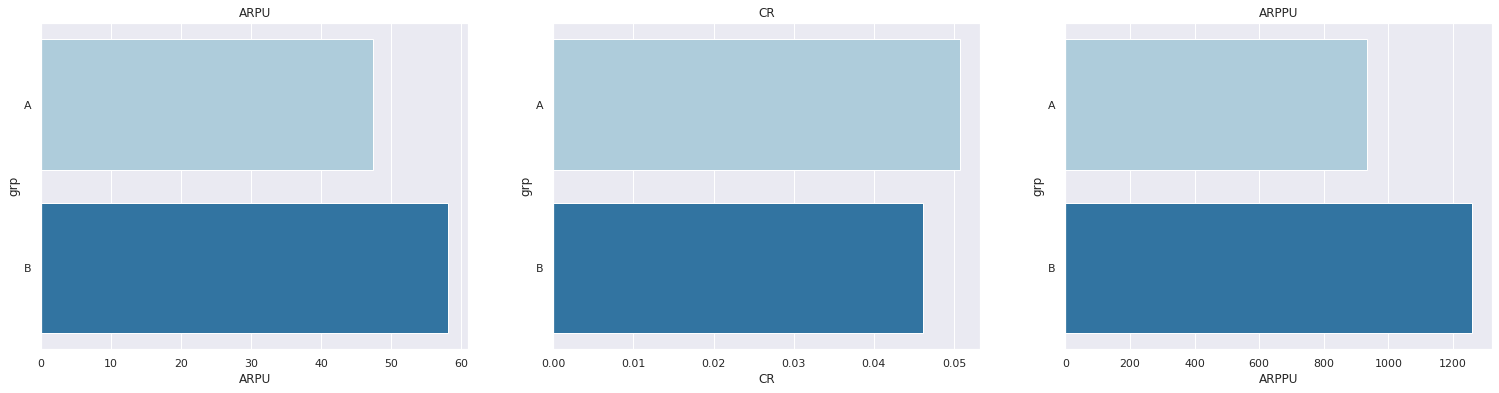

In [232]:
function = function('Проект_2_group_add.csv')
def graphics(function):
    sns.set(rc={'figure.figsize':(26,6)})
    fig, axes = plt.subplots(nrows=1, ncols=3)
    sns.barplot(x=function.ARPU, y=function.grp, ax=axes[0], palette='Paired').set_title('ARPU')   
    sns.barplot(x=function.CR, y=function.grp, ax=axes[1], palette='Paired').set_title('CR')
    sns.barplot(x=function.ARPPU, y=function.grp, ax=axes[2], palette='Paired').set_title('ARPPU')
graphics(function)